Ovaj dataset sadrži 704 podataka, i sadrži ove atribute:
* **age**: *Integer* (Godine).
* **gender**: *String* [f or m] (Muško/Žensko)
* **ethnicity**: *String* (Popis uobičajenih etničkih skupina)
* **jaundice**: *Boolean* [yes or no]. (Rođen s bolesti jaundice)
* **austim**: *Boolean* [yes or no]. (Ima člana obitelji s PDD)
* **relation**: *String* [Parent, self, caregiver, medical staff, clinician]. (Tko riješava test)
* **Country of residence**: *String* (Popis zemalja).
* **used_app_before**: *Boolean* [yes or no] (Je li korisnik koristio screening app)
* **Odgovori na 1-10 pitanja**: *Binary* [0, 1]
* **result**: *Integer* (Konačni rezultat dobiven na temelju algoritma bodovanja korištene metode probira. To je izračunato na automatiziran način)

In [151]:
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
from pandas import DataFrame
from matplotlib import pyplot as plt
from scipy.io.arff import loadarff
from collections import Counter

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 140)

path='data\\Autism-Adult-Data.arff'


data = loadarff(path)

df = pd.DataFrame(data[0]) #704 redaka

df["A1_Score"]=df["A1_Score"].apply(lambda x: int(x.decode()))
df["A2_Score"]=df["A2_Score"].apply(lambda x: int(x.decode()))
df["A3_Score"]=df["A3_Score"].apply(lambda x: int(x.decode()))
df["A4_Score"]=df["A4_Score"].apply(lambda x: int(x.decode()))
df["A5_Score"]=df["A5_Score"].apply(lambda x: int(x.decode()))
df["A6_Score"]=df["A6_Score"].apply(lambda x: int(x.decode()))
df["A7_Score"]=df["A7_Score"].apply(lambda x: int(x.decode()))
df["A8_Score"]=df["A8_Score"].apply(lambda x: int(x.decode()))
df["A9_Score"]=df["A9_Score"].apply(lambda x: int(x.decode()))
df["A10_Score"]=df["A10_Score"].apply(lambda x: int(x.decode()))
df["gender"]=df["gender"].apply(lambda x: x.decode())
df["ethnicity"]=df["ethnicity"].apply(lambda x: x.decode())
df["age_desc"]=df["age_desc"].apply(lambda x: x.decode())
df["used_app_before"]=df["used_app_before"].apply(lambda x: x.decode()=='yes')
df["jundice"]=df["jundice"].apply(lambda x: x.decode()=='yes')
df["austim"]=df["austim"].apply(lambda x: x.decode()=='yes')
df["contry_of_res"]=df["contry_of_res"].apply(lambda x: x.decode())
df["relation"]=df["relation"].apply(lambda x: x.decode())
df["Class/ASD"]=df["Class/ASD"].apply(lambda x: x.decode())
df.loc[df['age'] > 100, 'age'] = np.NAN
print(df[df.isna().any(axis=1)])
print("Nedostajuće vrijednosti (NaN) su u retku 52, 62 i 91, vrijednost koja fali u svim slučajevima je age")
print(Counter(df['ethnicity']=='?'))
print("Ethnicity je nepoznat za 95 ispitanika")
print(Counter(df['relation']=='?'))
print("Relation je nepoznat za 95 ispitanika")

df.loc[df['ethnicity'] == '?', 'ethnicity'] = np.NAN
df.loc[df['relation'] == '?', 'relation'] = np.NAN

df=df.dropna()
print("Izbacimo nedostajuće vrijednosti te nam ostane 608 vrijednosti.")



print("Ciljna varijabla je Class/ASD, redizajnirati ćemo ju tako da umjesto 'yes' bude True. Pokušavamo predvidjeti koji faktori utječu na to hoće li netko imati autizam ili ne.")
df["Class/ASD"]=df["Class/ASD"]=="YES"


    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  A8_Score  A9_Score  A10_Score  age gender ethnicity  jundice  \
52         1         0         0         0         0         0         0         0         0          0  NaN      f  Pasifika    False   
62         0         0         0         0         0         0         0         0         0          0  NaN      m         ?    False   
91         0         1         0         0         1         0         1         0         0          1  NaN      f         ?    False   

    austim contry_of_res  used_app_before  result     age_desc relation Class/ASD  
52   False   New Zealand            False     1.0  18 and more     Self        NO  
62   False  Saudi Arabia            False     0.0  18 and more        ?        NO  
91   False        Jordan            False     4.0  18 and more        ?        NO  
Nedostajuće vrijednosti (NaN) su u retku 52, 62 i 91, vrijednost koja fali u svim slučajevima je age
Counter({F

## ***Kategoričke varijable***

Counter({'United States': 112, 'India': 81, 'United Kingdom': 76, 'New Zealand': 75, 'United Arab Emirates': 67, 'Australia': 27, 'Canada': 15, 'Sri Lanka': 14, 'France': 11, 'Afghanistan': 10, 'Netherlands': 10, 'Brazil': 8, 'Mexico': 8, 'Jordan': 5, 'Ireland': 5, 'Italy': 5, 'Viet Nam': 5, 'Malaysia': 5, 'Philippines': 4, 'Germany': 4, 'Spain': 3, 'Bangladesh': 3, 'Romania': 3, 'Austria': 3, 'Belgium': 3, 'South Africa': 2, 'Pakistan': 2, 'Egypt': 2, 'Saudi Arabia': 2, 'Sweden': 2, 'Ethiopia': 2, 'Iran': 2, 'Armenia': 2, 'Iceland': 2, 'Russia': 2, 'AmericanSamoa': 2, 'Bahamas': 1, 'Burundi': 1, 'Chile': 1, 'China': 1, 'Tonga': 1, 'Oman': 1, 'Sierra Leone': 1, 'Costa Rica': 1, 'Nicaragua': 1, 'Uruguay': 1, 'Ukraine': 1, 'Serbia': 1, 'Portugal': 1, 'Ecuador': 1, 'Niger': 1, 'Bolivia': 1, 'Aruba': 1, 'Finland': 1, 'Turkey': 1, 'Nepal': 1, 'Indonesia': 1, 'Angola': 1, 'Czech Republic': 1, 'Cyprus': 1})
Counter({'White-European': 233, 'Asian': 123, 'Middle Eastern ': 92, 'Black': 43, 'Sou

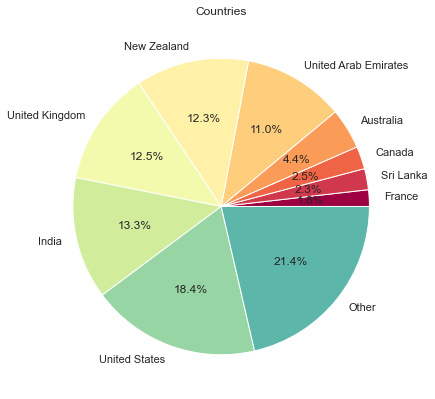

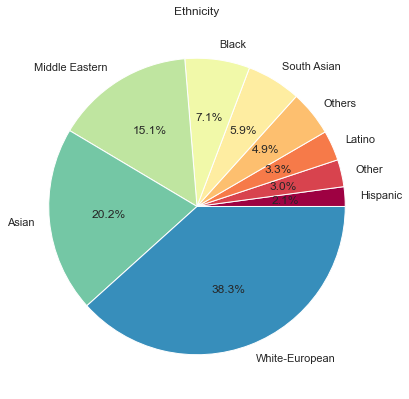

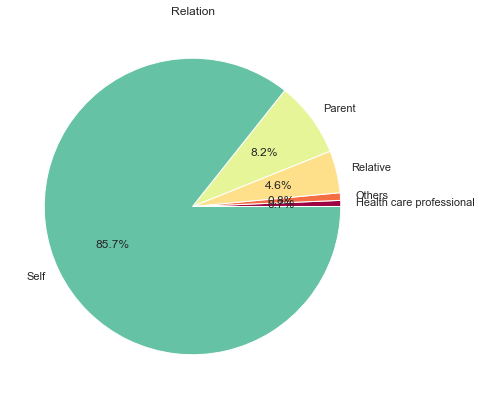

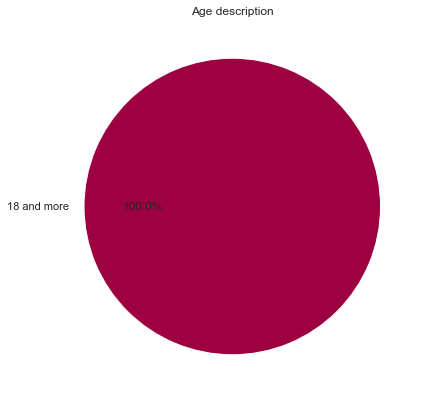

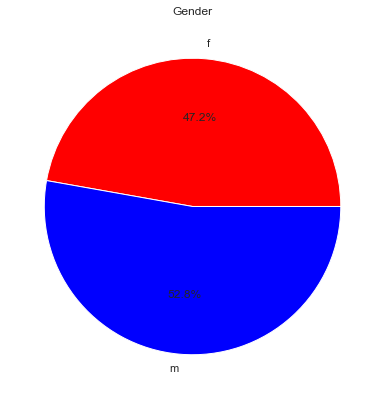

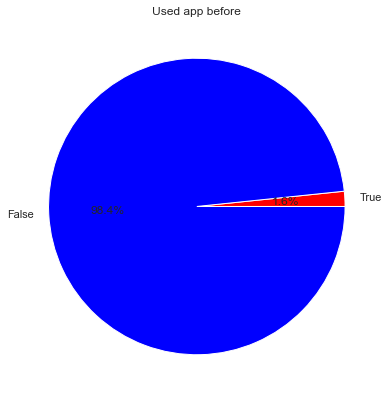

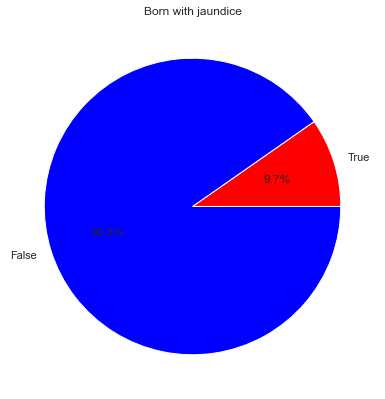

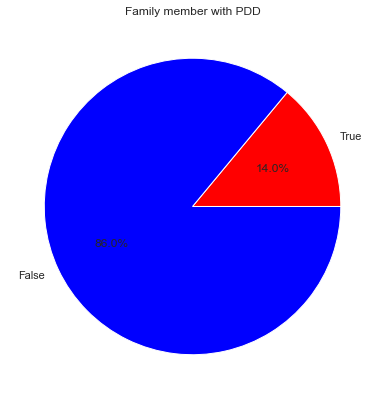

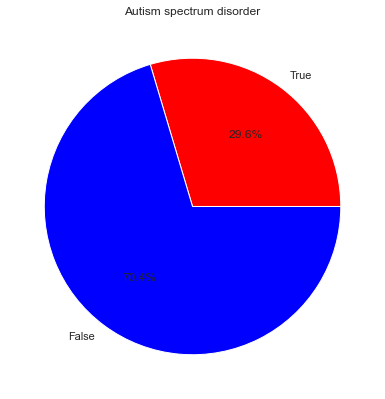

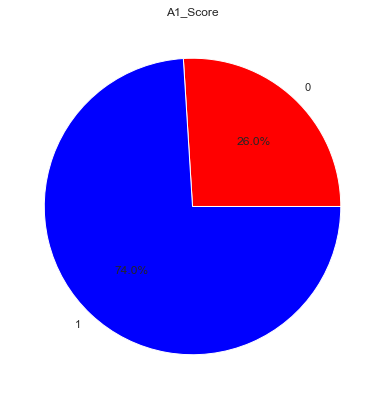

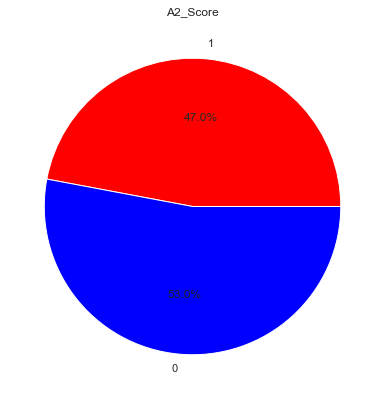

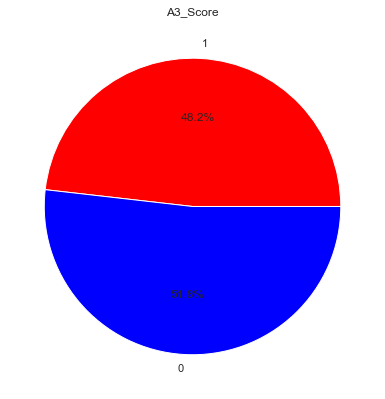

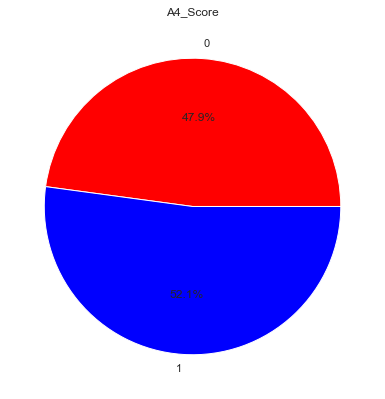

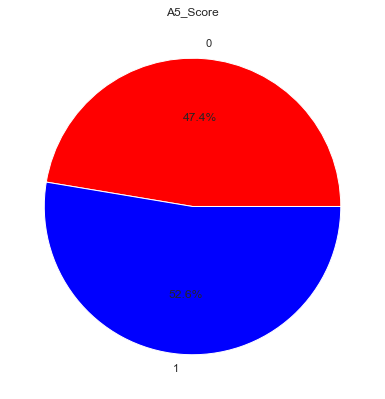

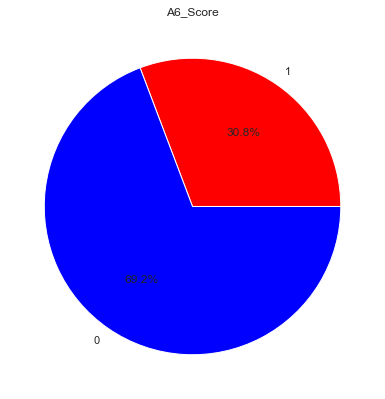

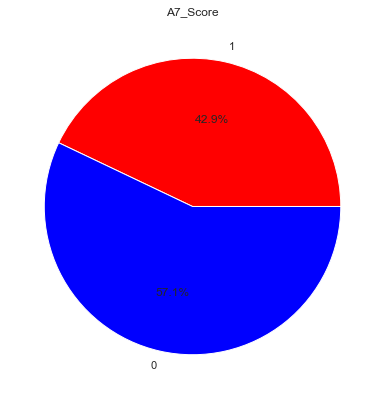

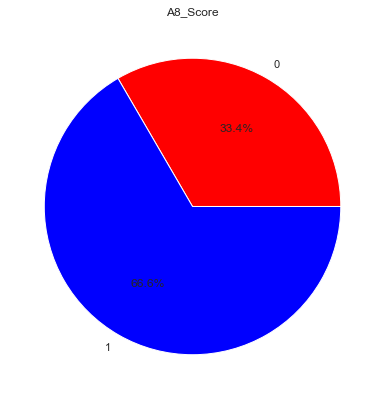

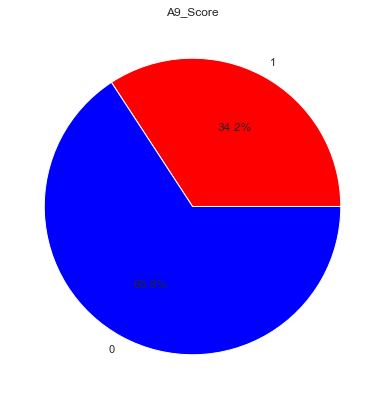

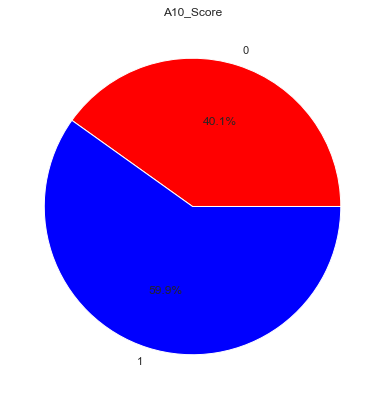

In [152]:
def group_lower_ranking_values(column,quantile):
    rating_counts = df.groupby(column).agg('count')
    pct_value = rating_counts[lambda x: x.columns[0]].quantile(quantile)
    values_below_pct_value = rating_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row
    rating_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return rating_grouped


import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
print(Counter(df['contry_of_res']))
data_grouped = group_lower_ranking_values('contry_of_res',.85)
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 12)]
plt.subplot(the_grid[0, 1], aspect=1, title='Countries')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',  colors=colors)
plt.show()

print(Counter(df['ethnicity']))
data_grouped = group_lower_ranking_values('ethnicity',.30)
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 1], aspect=1, title='Ethnicity')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',  colors=colors)
plt.show()

print(Counter(df['relation']))
data_grouped = df.groupby('relation').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='Relation')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=colors)
plt.show()

print(Counter(df['age_desc']))
data_grouped = df.groupby('age_desc').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='Age description')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=colors)
plt.show()

print(Counter(df['gender']))
data_grouped = df.groupby('gender').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='Gender')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()

print(Counter(df['used_app_before']))
data_grouped = df.groupby('used_app_before').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='Used app before')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()

print(Counter(df['jundice']))
data_grouped = df.groupby('jundice').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='Born with jaundice')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()

print(Counter(df['austim']))
data_grouped = df.groupby('austim').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='Family member with PDD')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()


print(Counter(df['Class/ASD']))
data_grouped = df.groupby('Class/ASD').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='Autism spectrum disorder')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()


print(Counter(df['A1_Score']))
data_grouped = df.groupby('A1_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A1_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A2_Score']))
data_grouped = df.groupby('A2_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A2_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A3_Score']))
data_grouped = df.groupby('A3_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A3_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A4_Score']))
data_grouped = df.groupby('A4_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A4_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A5_Score']))
data_grouped = df.groupby('A5_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A5_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A6_Score']))
data_grouped = df.groupby('A6_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A6_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A7_Score']))
data_grouped = df.groupby('A7_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A7_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A8_Score']))
data_grouped = df.groupby('A8_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A8_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A9_Score']))
data_grouped = df.groupby('A9_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A9_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()
print(Counter(df['A10_Score']))
data_grouped = df.groupby('A10_Score').agg('count')
rating_labels = data_grouped.result.sort_values().index
rating_counts = data_grouped.result.sort_values()
plt.figure(1, figsize=(30,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='A10_Score')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%',   colors=['red','blue'])
plt.show()



# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
# df.groupby('gender').size().plot(autopct='%1.1f%%',kind='pie', textprops={'fontsize': 20}, colors=['red','blue'], ax=ax1, label='')
# df.groupby('contry_of_res').size().plot(autopct='%1.1f%%',kind='pie', textprops={'fontsize': 12}, ax=ax2, label='')
# ax1.set_xlabel('Per gender', size=22)
# ax2.set_xlabel('Per country', size=22)
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
# df.groupby('ethnicity').size().plot(autopct='%1.1f%%',kind='pie', textprops={'fontsize': 12}, ax=ax1, label='')
# ax1.set_xlabel('Per ethnicity', size=22)
#plt.pyplot.show()

from scipy.stats import zscore
import seaborn as sns

## ***Kontinuirane varijable***

In [153]:
def get_z_value(x):
    if x>3:
        return 'vece od 3'
    elif x<-3:
        return 'manje od -3'
    else:
        return '-3 izmedu 3'
print("Srednja vrijednost 'age' je:", df.age.mean())
print("Median vrijednost 'age' je:", df.age.median())
df_zscore_age = (df.age - df.age.mean())/df.age.std()
# display(df_zscore_age)
# grouped = DataFrame(df_zscore_age.groupby(get_z_value))
# display(grouped)
print("Nagnutnost distribucije 'age' je: ",df.age.skew())

print()
print()

print("Srednja vrijednost 'result' je:",df.result.mean())
print("Median vrijednost 'result' je:",df.result.median())
df_zscore_result = (df.result - df.result.mean())/df.result.std()
print("Nagnutnost distribucije 'result' je: ",df.result.skew())

Srednja vrijednost 'age' je: 29.63486842105263
Median vrijednost 'age' je: 27.0
Nagnutnost distribucije 'age' je:  0.9955698901171849


Srednja vrijednost 'result' je: 5.083881578947368
Median vrijednost 'result' je: 5.0
Nagnutnost distribucije 'result' je:  0.2318606526555377


## ***Korelacija između varijabli***

(16.5, -0.5)

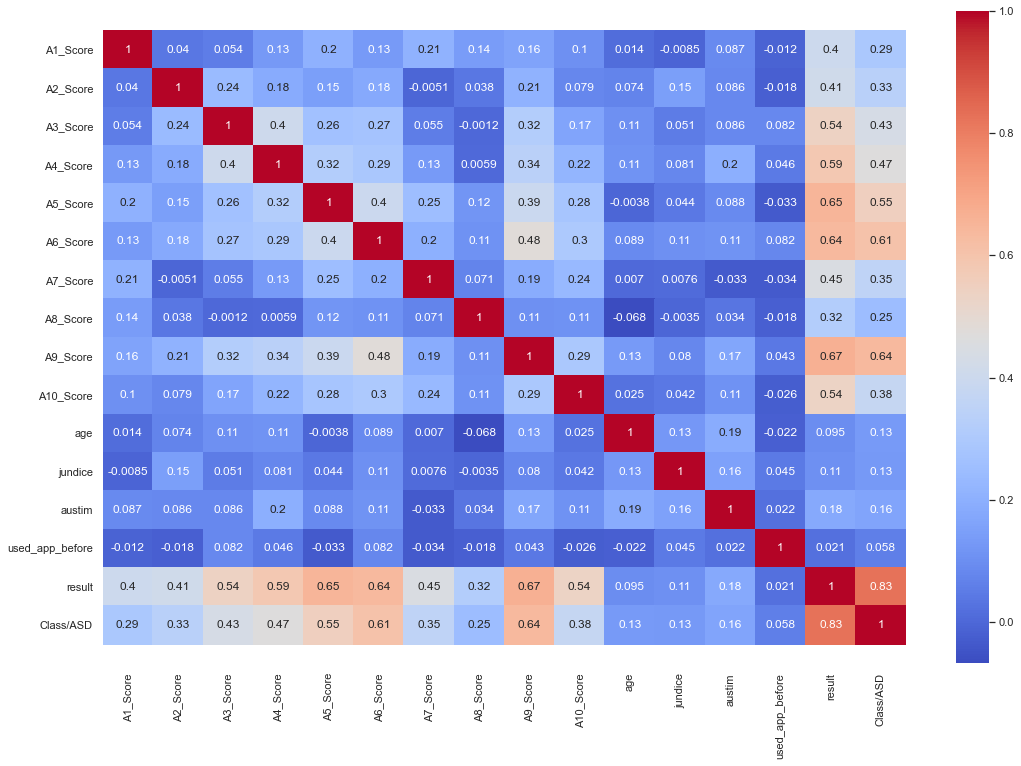

In [154]:
plt.figure(figsize=(18,12))
fig = sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
top,bottom = fig.get_ylim()
fig.set_ylim(top+0.5,bottom-0.5)

## ***Korelacija s ciljnom varijablom***

In [155]:
print(df[df.columns[1:]].corr()['Class/ASD'][:])

A2_Score           0.334416
A3_Score           0.434471
A4_Score           0.469886
A5_Score           0.550287
A6_Score           0.606120
A7_Score           0.354698
A8_Score           0.245221
A9_Score           0.641113
A10_Score          0.376602
age                0.132314
jundice            0.128198
austim             0.164520
used_app_before    0.057771
result             0.827110
Class/ASD          1.000000
Name: Class/ASD, dtype: float64


Na temelju ovoga možemo zaključiti da će atribut "result" imati najveću korelaciju.

## ***IV za svaku varijablu***

In [156]:
def dodijeliPrediktivnost(a):
    if a<0.02:
        return "Varijabla nije korisna"
    if a<0.1:
        return "Slaba prediktivnost"
    if a<0.3:
        return "Srednja prediktivnost"
    if a<0.5:
        return "Jaka prediktivnost"
    else:
        return "Super prediktivnost"
def calcIV(df,i):
    a = df[i]
    b = df['Class/ASD']
    IV=pd.crosstab(a,b).apply(lambda c: c/c.sum(), axis=0)
    IV=IV.replace(0, 0.00000001)#

    IV['IV'] = (IV[0]-IV[1])* np.log(IV[0]/IV[1])
    IV=IV.replace([np.inf, -np.inf], np.nan)#np.nan
    return round(IV['IV'].sum(),4)

novidf = pd.DataFrame(columns = ['Nezavisna varijabla','IV','Prediktivnost'])
najaciIV=list()
for i in df:
    if i in ["Class/ASD"]:
        continue
    ivsum=calcIV(df,i)
    novidf=novidf.append({'Nezavisna varijabla':i,'IV':ivsum,'Prediktivnost':dodijeliPrediktivnost(ivsum)}, ignore_index=True)
    if ivsum>3:
        najaciIV.append(i)
novidf.sort_values(by=['IV'], ascending=False)

,Nezavisna varijabla,IV,Prediktivnost
17,result,33.6895,Super prediktivnost
15,contry_of_res,3.7434,Super prediktivnost
8,A9_Score,2.1538,Super prediktivnost
4,A5_Score,2.1497,Super prediktivnost
5,A6_Score,1.8231,Super prediktivnost
3,A4_Score,1.3164,Super prediktivnost
10,age,1.2013,Super prediktivnost
2,A3_Score,1.0235,Super prediktivnost
9,A10_Score,0.8526,Super prediktivnost
12,ethnicity,0.8304,Super prediktivnost


## ***WoE graf za varijable s najjačim IV***

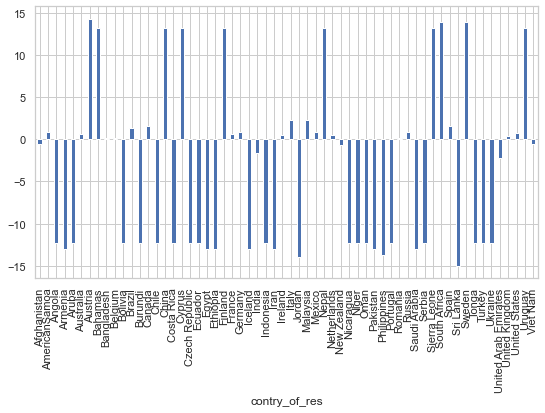

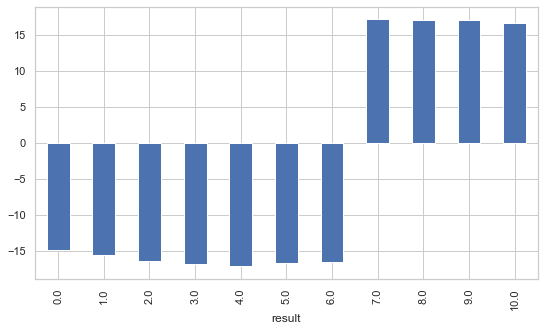

In [157]:
def calcWoE(df,i):
    a = df[i]
    b = df['Class/ASD']
    IV=pd.crosstab(a,b).apply(lambda c: c/c.sum(), axis=0)
    IV=IV.replace(0, 0.00000001)
    IV['WOE']=np.log(IV[1]/IV[0])
    IV['IV'] = (IV[1]-IV[0])* np.log(IV[1]/IV[0])
    return IV

for i in najaciIV:
    woe=calcWoE(df,i)
    fig = plt.figure(figsize = (9,5))
    woe['WOE'].plot(kind='bar')
    plt.show()

## ***Vizualizacija sa Seaborn***

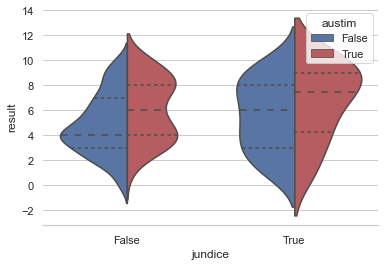

In [158]:
sns.set(style="whitegrid", color_codes=True)
sns.violinplot(x="jundice", y="result", hue="austim", data=df, split=True,
                inner="quart", palette={True: "r", False: "b"})
sns.despine(left=True)

Nema korelacije.

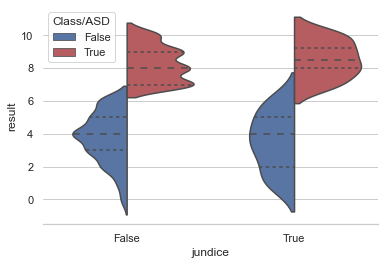

In [159]:
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=df, split=True,
                inner="quart", palette={True: "r", False: "b"})
sns.despine(left=True)

Veći result daje veću šansu da je cilja varijabla pozitivna.

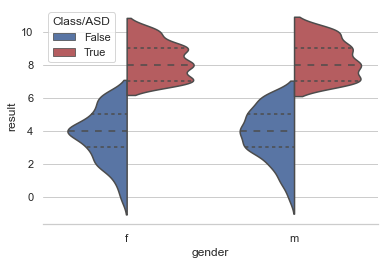

In [160]:
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=df, split=True,
                inner="quart", palette={True: "r", False: "b"})
sns.despine(left=True)

Veći result daje veću šansu da je cilja varijabla pozitivna.

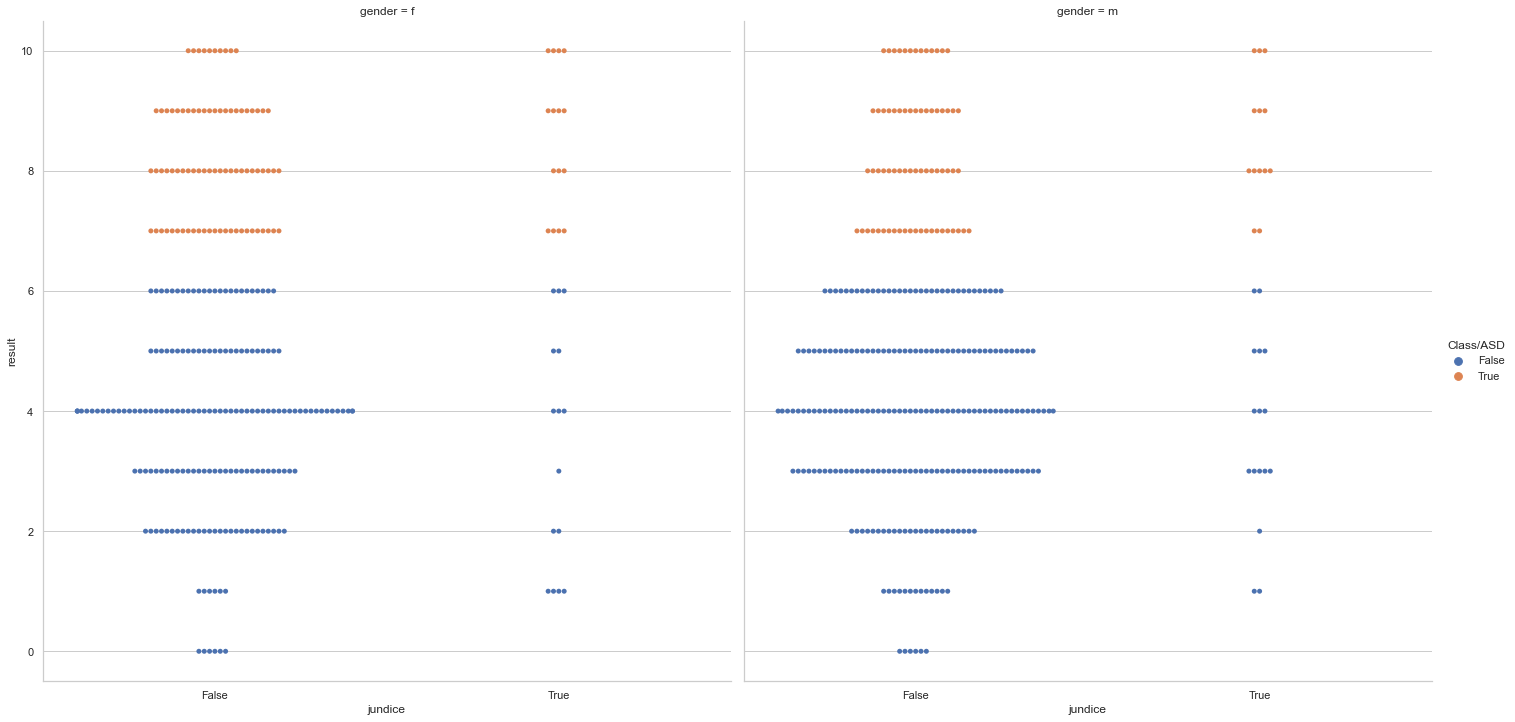

In [161]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", height=10, col="gender", data=df, kind="swarm");

Ovdje vidimo da ciljna skupina većinom nema Jaundice bolest.

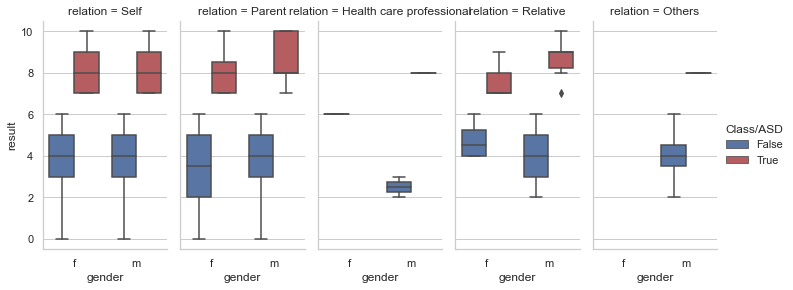

In [162]:
sns.catplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=df, kind="box", height=4, aspect=.5, palette={True: "r", False: "b"});

In [163]:
features_raw = df[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Neki od atributa zahtijevaju normalizaciju ulaznih podataka, pa radim normalizaciju podataka atributa.

In [164]:
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']
df_raw = df['Class/ASD']
features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.191489,f,White-European,False,False,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.148936,m,Latino,False,True,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.212766,m,Latino,True,True,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.382979,f,White-European,False,True,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
5,0.404255,m,Others,True,False,United States,0.9,Self,1,1,1,1,1,0,1,1,1,1


### **One-Hot-Coding**

In [165]:
features_final = pd.get_dummies(features_minmax_transform)
asd_classes = df_raw.apply(lambda x: 1 if x == True else 0)
encoded = list(features_final.columns)
print(encoded)

['age', 'jundice', 'austim', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Costa Rica', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'contry_of_res_Ecuador', 'contry_of_res_Egypt', 'contry_of_res_Ethiopia', 'contry

Sada su sve kategoričke varijable pretvorene u numeričke, a sve numeričke su normalizirane. 80% ćemo uzeti za učenje, a 20% za testiranje

In [166]:
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(1337)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


### **Stablo odlučivanja**

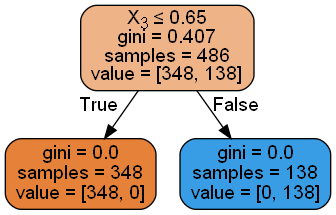

In [167]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)
dectree.fit(X_train, y_train)
import pydotplus


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

from IPython.display import Image
Image(graph.create_png())  #pip install graphviz
#choco install graphviz
#dodaj u path


Možemo koristiti **F-beta score** kao metriku koja mjeri i preciznost i opozivanje:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

Za klasifikacijske probleme koji su iskrivljeni u njihovoj klasifikacijskoj raspodjeli (ima puno više pozitvinih od negativnih) kao u našem slučaju točnost sama po sebi nije baš dobra metrika. Stoga, u ovom slučaju preciznost i opoziv vrlo dobro dolaze. Te se dvije metrike mogu kombinirati kako bi se dobio F1 rezultat, koji je ponderirani prosjek (harmonička sredina) rezultata preciznosti i opoziva. Ta se ocjena može kretati od 0 do 1, s tim da je 1 najbolja moguća F1 ocjena (uzimamo harmonijsku sredinu jer imamo posla s omjerima).

In [168]:
from sklearn import metrics
y_pred_class = dectree.predict(X_test)
print('True:', y_test.values)
print('False:', y_pred_class)

confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

accuracy=(TP + TN) / float(TP + TN + FP + FN)
print("Koliko često je model točan?", accuracy)

error = (FP + FN) / float(TP + TN + FP + FN)
print("Koliko često je model netočan?", error)

sensitivity = TP / float(FN + TP)
print("Kada je ciljna varijabla pozitivna, koliko često je model točan?", sensitivity)

specificity = TN / (TN + FP)
print("Kada je ciljna varijabla negativna, koliko često je model točan?", specificity)

false_positive = FP / float(TN + FP)
print("Kada je ciljna varijabla negativna, koliko često je model netočan?", false_positive)

precision = TP / float(TP + FP)
print("Kada je ciljna varijabla pozitivna, koliko često je model točan?", precision)


dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
beta_score = fbeta_score(y_test, predictions_test, average='binary', beta=0.5)
print("Beta score:", beta_score)


True: [1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 1 0 0 1 0 0]
False: [1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 1 0 0 1 0 0]
[[80  0]
 [ 0 42]]
Koliko često je model točan? 1.0
Koliko često je model netočan? 0.0
Kada je ciljna varijabla pozitivna, koliko često je model točan? 1.0
Kada je ciljna varijabla negativna, koliko često je model točan? 1.0
Kada je ciljna varijabla negativna, koliko često je model netočan? 0.0
Kada je ciljna varijabla pozitivna, koliko često je model točan? 1.0
Beta score: 1.0


### **Logistička regresija**

In [169]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
beta_score = fbeta_score(y_test, predictions_test, average='binary', beta=0.5)
print("Beta score:", beta_score)


Beta score: 0.9761904761904762


### **Izdvajanje bitnih značajki/atributa**

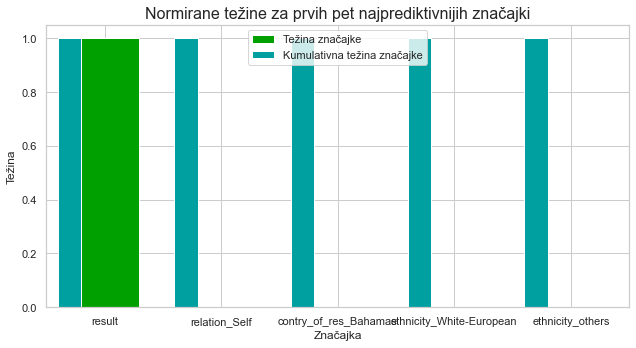

In [170]:
from sklearn.ensemble import AdaBoostClassifier
def feature_plot(importances, X_train, y_train):
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normirane težine za prvih pet najprediktivnijih značajki", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Težina značajke")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Kumulativna težina značajke")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Težina", fontsize = 12)
    plt.xlabel("Značajka", fontsize = 12)

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_plot(importances, X_train, y_train)

Gledajući ovaj graf možemo zaključiti da je "result" atribut definitivno dominantan pri odlučivanju.

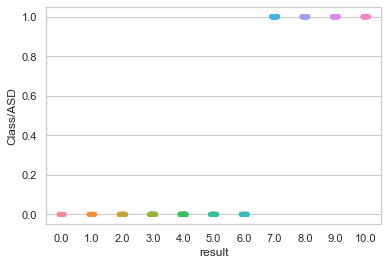

In [171]:
sns.stripplot(x="result", y="Class/ASD", data = df, jitter=True);

Algoritam za odlučivanje je zapravo vrlo jednostavan, ako je "result" jednak ili veći od 7 onda će osoba imati ASD. Ako je rezultat jednak ili manji od 6 onda osoba neće imati dijagnozu.